In [ ]:
%matplotlib inline

In [1]:
"""
Script python pour ouvrir les fichiers de traces de clavier

"""
import matplotlib.pyplot as plt
import numpy as np
import time

def read_int(f):
    ba = bytearray(4)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.int32)
    return prm[0]

def read_double(f):
    ba = bytearray(8)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.double)
    return prm[0]

def read_double_tab(f, n):
    ba = bytearray(8*n)
    nr = f.readinto(ba)
    if nr != len(ba):
        return []
    else:
        prm = np.frombuffer(ba, dtype=np.double)
        return prm

def get_pics_from_file(filename):
    # Lecture du fichier d'infos + pics detectes (post-processing KeyFinder)
    print("Ouverture du fichier de pics "+filename)
    f_pic = open(filename, "rb")
    info = dict()
    info["nb_pics"] = read_int(f_pic)
    print("Nb pics par trame: " + str(info["nb_pics"]))
    info["freq_sampling_khz"] = read_double(f_pic)
    print("Frequence d'echantillonnage: " + str(info["freq_sampling_khz"]) + " kHz")
    info["freq_trame_hz"] = read_double(f_pic)
    print("Frequence trame: " + str(info["freq_trame_hz"]) + " Hz")
    info["freq_pic_khz"] = read_double(f_pic)
    print("Frequence pic: " + str(info["freq_pic_khz"]) + " kHz")
    info["norm_fact"] = read_double(f_pic)
    print("Facteur de normalisation: " + str(info["norm_fact"]))
    tab_pics = []
    pics = read_double_tab(f_pic, info["nb_pics"])
    nb_trames = 1
    while len(pics) > 0:
        nb_trames = nb_trames+1
        tab_pics.append(pics)
        pics = read_double_tab(f_pic, info["nb_pics"])
    print("Nb trames: " + str(nb_trames))
    f_pic.close()
    return tab_pics, info
  
def get_pics_from_file2(filename):
  # Lecture du fichier d'infos + pics detectes (post-processing KeyFinder)
  f_pic = open(filename, "rb")
  info = dict()
  info["nb_pics"] = read_int(f_pic)
  info["freq_sampling_khz"] = read_double(f_pic)
  info["freq_trame_hz"] = read_double(f_pic)
  info["freq_pic_khz"] = read_double(f_pic)
  info["norm_fact"] = read_double(f_pic)
  tab_pics = []
  pics = read_double_tab(f_pic, info["nb_pics"])
  nb_trames = 1
  while len(pics) > 0:
    nb_trames = nb_trames+1
    tab_pics.append(pics)
    pics = read_double_tab(f_pic, info["nb_pics"])
  f_pic.close()
  return tab_pics, info

In [2]:
# build dict of mean signal for each letter

import os
dictio = {}
for file in os.listdir("data/"):
  pics, info = get_pics_from_file("data/" + file)
  label = file.split('_')[1]
  label = label.split(".")[0]
  if (label == "LOGINMDP"):
    continue
  mean = np.mean(pics, 0)
  dictio[label] = mean

print(dictio)

Ouverture du fichier de pics data/pics_0.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8701
Ouverture du fichier de pics data/pics_1.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8390
Ouverture du fichier de pics data/pics_2.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8367
Ouverture du fichier de pics data/pics_3.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8112
Ouverture du fichier de pics data/pics_4.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
N

Ouverture du fichier de pics data/pics_Y.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8095
Ouverture du fichier de pics data/pics_Z.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7713
{'0': array([0.65345403, 1.23764585, 0.3850466 , 0.74122532, 0.70162269,
       0.63722808, 0.68958958, 0.67098283, 0.61669873, 0.33475047,
       0.5694625 , 0.55023341, 0.41927175, 0.62350338, 0.7626133 ,
       0.75402509, 0.32976355]), '1': array([0.62258028, 0.48727641, 1.12209202, 0.84813599, 0.70516406,
       0.64363831, 0.68911129, 0.667198  , 0.62298138, 0.33835965,
       0.56869516, 0.55451142, 0.42437695, 0.6230091 , 0.75321268,
       0.75359494, 0.33574072]), '2': array([0.61803181, 0.48419497, 1.02562036, 0.83082571, 0.69871436,
       0.63684203, 0.68540394, 0.6556675 , 

In [ ]:
# Try to identify groups of signals with correlation matrix
import seaborn as sns
corr_mat = np.corrcoef([dictio.get(x) for x in dictio])

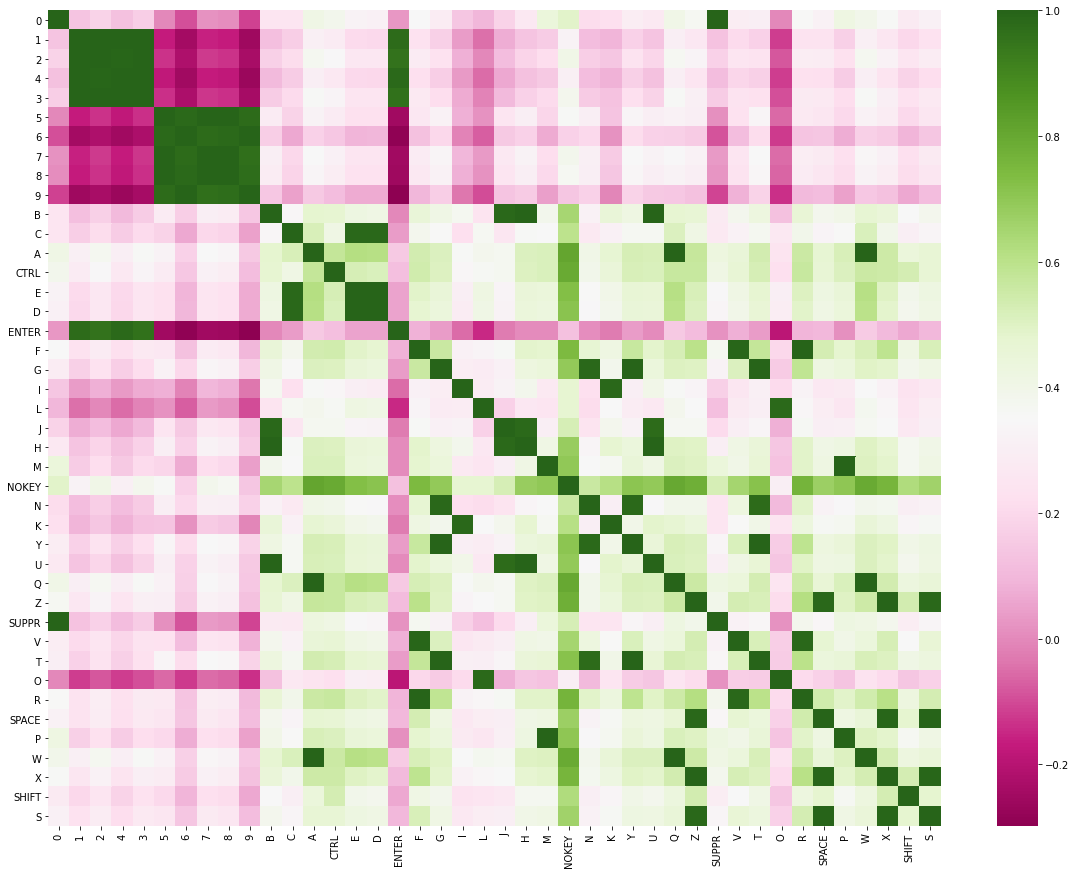

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(corr_mat, cmap="PiYG", xticklabels=dictio.keys(), yticklabels=dictio.keys())

In [ ]:
# try to predict with the squared distance to the mean signals, ended up with bad results but built first intuition for 1-NN

from sklearn.metrics import mean_squared_error

login_mdp, info = get_pics_from_file('data/pics_LOGINMDP.bin')

all_letters = []
for trame in login_mdp:
  min_dist = 10
  let = 'A'
  for letter in dictio:
    min = mean_squared_error(trame, dictio[letter])
    if min < min_dist:
      min_dist = min
      let = letter
  all_letters.append(let)

print(all_letters)

['NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'Z', 'R', 'NOKEY', 'A', 'NOKEY', 'NOKEY', 'NOKEY', '7', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', '2', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', '7', 'NOKEY', 'NOKEY', 'NOKEY', 'P', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'L', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'L', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', '7', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', '2', 'NOKEY', 'NOKEY', 'K', 'NOKEY', 'NOKEY', 'NOKEY', '7', 'NOKEY', 'NOKEY', 'NOKEY', '2', '7', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'R', 'NOKEY', 'R', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKE

In [ ]:
prev_letter = all_letters[0]
trimmed_letter = []
for i in range(1, len(all_letters)):
  if prev_letter != all_letters[i]:
    trimmed_letter.append(all_letters[i])
    prev_letter = all_letters[i]

print(trimmed_letter)
sequence = [value for value in trimmed_letter if value != 'NOKEY']

['Z', 'R', 'NOKEY', 'A', 'NOKEY', '7', 'NOKEY', '2', 'NOKEY', '7', 'NOKEY', 'P', 'NOKEY', 'L', 'NOKEY', 'L', 'NOKEY', '7', 'NOKEY', '2', 'NOKEY', 'K', 'NOKEY', '7', 'NOKEY', '2', '7', 'NOKEY', 'R', 'NOKEY', 'R', 'NOKEY', 'Q', 'NOKEY', '7', 'NOKEY', '2', '7', 'NOKEY', 'E', 'NOKEY', '2', 'NOKEY', 'A', 'NOKEY', 'CTRL', 'NOKEY', 'L', 'E', 'NOKEY', 'P', 'NOKEY', '2', 'NOKEY', '0', 'NOKEY', '2', 'NOKEY', '0', 'NOKEY', '7', 'NOKEY', 'E', 'NOKEY', 'CTRL', 'P', 'NOKEY', '2', 'NOKEY', 'CTRL', 'NOKEY', 'E', 'NOKEY', 'Q', 'NOKEY', '2', 'NOKEY', 'P', 'NOKEY', 'T', 'NOKEY', '7', 'NOKEY', 'A', 'NOKEY', 'L', 'NOKEY', 'E', '2', 'NOKEY', 'Q', 'NOKEY', '3', 'NOKEY', '7', 'NOKEY', 'T', 'NOKEY', '2', 'NOKEY', 'Z', 'U', 'NOKEY', '7', 'NOKEY', '2', 'NOKEY', '2', 'NOKEY', 'T', 'NOKEY', 'H', 'NOKEY', 'R', 'NOKEY', 'A', 'NOKEY', 'H', 'NOKEY', 'R', 'NOKEY', '2', 'NOKEY', '0', 'NOKEY', 'A', 'E', 'NOKEY', 'A', 'NOKEY', 'H', 'NOKEY', 'CTRL', 'NOKEY', '7', 'NOKEY', 'Z', 'NOKEY', 'A', 'L', 'U', 'NOKEY', 'E', 'NOKEY',

In [ ]:
print(''.join(sequence))

ZRA727PLL72K727RRQ727E2ACTRLLEP20207ECTRLP2CTRLEQ2PT7ALE2Q37T2ZU722THRAHR20AEAHCTRL7ZALUE22E2H37M2R27EZCTRLQ0CTRL2TAA0E7727CTRL0TT227TCTRL2222220E22R7CTRL2ZCTRL2ZCTRLECTRLZECTRLRLH7EQRZ277AZAA0ZCTRL0TZ7232CTRL222CTRL7CTRLL0LCTRLHCTRL027277L02LR0H0E2R7ZCTRLCTRLSHIFTCTRLSHIFTCTRL2SHIFTCTRLSHIFTCTRLSHIFTCTRL2CTRLSHIFTCTRLSHIFTCTRL2CTRL2CTRLSHIFTCTRL2CTRLFCTRLSHIFT2CTRLCTRL0SHIFTCTRL2CTRLCTRLSHIFTCTRLENTER220CTRL2CTRLSHIFTCTRLSHIFTCTRLSHIFTCTRLCTRLCTRLSHIFT2QCTRLSHIFTCTRL0CTRL2CTRLCTRL2CTRLSHIFT8CTRL2CTRLSHIFT2CTRL80CTRLSHIFTCTRLSPACECTRLSUPPR2CTRL0CTRLENTERSUPPR1SUPPRPSUPPR3SUPPRENTERSUPPRCTRLENTERSUPPRPSUPPRPSUPPRPSUPPRENTERSUPPRPSUPPRPSUPPRP2SUPPRCTRLSUPPRENTERSUPPRSHIFTENTERSUPPRSHIFTSUPPRSUPPRENTERSUPPRENTERSUPPRENTERSUPPRENTERSUPPRENTERCTRLSUPPRPSUPPRENTERSUPPRSUPPRENTERSUPPRPSUPPRENTERSUPPRENTERSUPPRCTRLSUPPRENTERSUPPRENTERSUPPRPSUPPRCTRLSUPPRPSUPPRENTERSUPPR0CTRL02M22Z22EK2K02E2L2Z0LE2770A2HZCTRLCTRLA77A0227TCTRLELL72HAG7KHZ2TQ72H0ZCTRLCTRLCTRL2ETA2LCTRLCTRLCTRLK0CTRLP72ZCTRL722K7Z